# Eigenface

In [7]:
# Some general setup
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from data_utils import load_image

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (11.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Load path of dataset
dataset_path = 'dataset/'

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
    del X_neutral, X_smile
    del original_size
    print('Clear previously loaded data.')
except:
    pass

# Function from data_utils.py
X_neutral, X_smile, original_size = load_image(dataset_path)

# Check and print out the size of the training data
print('Training data of neutral: ', X_neutral.shape)
print('Training data of smiling: ', X_smile.shape)
print('Original size of image: ', original_size)

Clear previously loaded data.
Training data of neutral:  (200, 31266)
Training data of smiling:  (200, 31266)
Original size of image:  (193, 162)


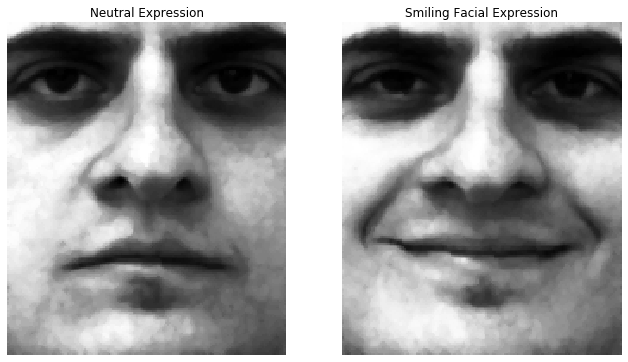

In [9]:
# Visualize the first individual pictures from the dataset.
plt.subplot(1,2,1)
plt.imshow(X_neutral[0,:].reshape(original_size))
plt.axis('off')
plt.title('Neutral Expression')
plt.subplot(1,2,2)
plt.imshow(X_smile[0,:].reshape(original_size))
plt.axis('off')
plt.title('Smiling Facial Expression')

plt.show()

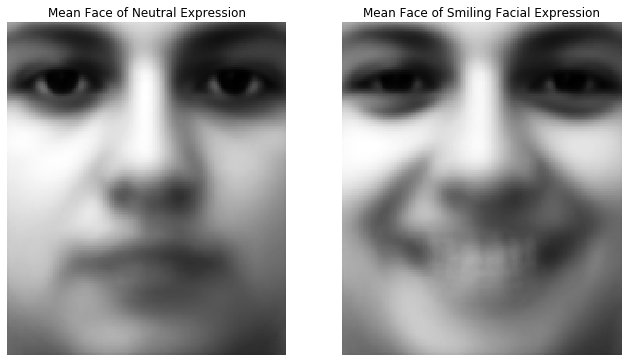

Randomly selected normalized images from neutral expression for visualization


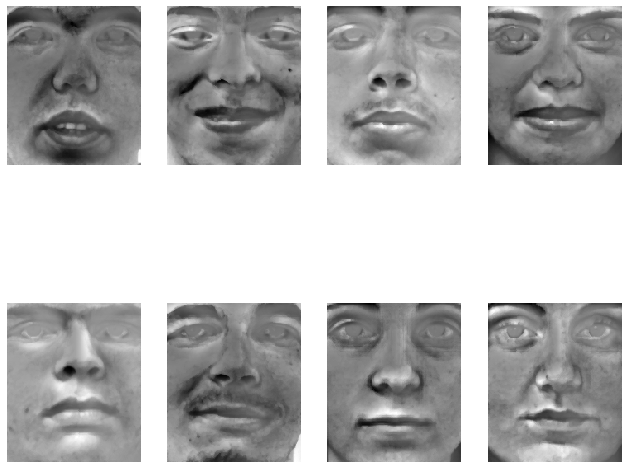

Randomly selected normalized images from smile expression for visualization


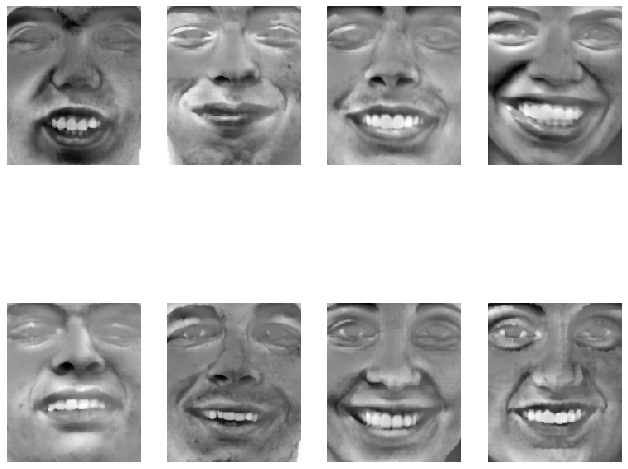

In [10]:
# Compute the mean face and normalize every images in training data
# For better computation performance, we will use broadcasting in numpy. If you don't know it, please refer to the following link:
# http://cs231n.github.io/python-numpy-tutorial/#numpy-broadcasting

# Compute the mean face
mean_neutral = np.mean(X_neutral, axis=0)
mean_smile = np.mean(X_smile, axis=0)
# Visualize the mean face
plt.subplot(1,2,1)
plt.imshow(mean_neutral.reshape(original_size))
plt.axis('off')
plt.title('Mean Face of Neutral Expression')
plt.subplot(1,2,2)
plt.imshow(mean_smile.reshape(original_size))
plt.axis('off')
plt.title('Mean Face of Smiling Facial Expression')
plt.show()

# Normalize the training data
X_neutral_nor = X_neutral - mean_neutral # shape of (200, 31266)
X_smile_nor = X_smile - mean_smile # shape of (200, 31266)
# Randomly select some images for visualization
idxs = np.random.choice(200, 8, replace=False)
print('Randomly selected normalized images from neutral expression for visualization')
for i,idx in enumerate(idxs):
    plt.subplot(2, 4, i+1)
    plt.imshow(X_neutral_nor[idx,:].reshape(original_size))
    plt.axis('off')
plt.show()

print('Randomly selected normalized images from smile expression for visualization')
for i,idx in enumerate(idxs):
    plt.subplot(2, 4, i+1)
    plt.imshow(X_smile_nor[idx,:].reshape(original_size))
    plt.axis('off')
plt.show()

In [22]:
# Compute eigenvectors and eigenvalues
evalue_neutral, evector_neutral = np.linalg.eig(np.dot(X_neutral_nor[range(1,191),:],X_neutral_nor[range(1,191),:].T))
evalue_smile, evector_smile = np.linalg.eig(np.dot(X_smile_nor[range(1,191),:],X_smile_nor[range(1,191),:].T))

# As usual, check and print out the size of the matrix. The column v[:,i] is the eigenvector 
print('Eigenvalues of neutral training data: ', evalue_neutral.shape)
print('Eigenvectors of neutral training data: ', evector_neutral.shape)
print('Eigenvalues of smile training data: ', evalue_smile.shape)
print('Eigenvectors of smile training data: ', evector_smile.shape)

# Sort eigenvalues and corresponding eigenvectors
idx = evalue_neutral.argsort()[::-1] 
evalue_neutral = evalue_neutral[idx]
evector_neutral = evector_neutral[:,idx]

idx = evalue_smile.argsort()[::-1] 
evalue_smile = evalue_smile[idx]
evector_smile = evector_smile[:,idx]

Eigenvalues of neutral training data:  (190,)
Eigenvectors of neutral training data:  (190, 190)
Eigenvalues of smile training data:  (190,)
Eigenvectors of smile training data:  (190, 190)


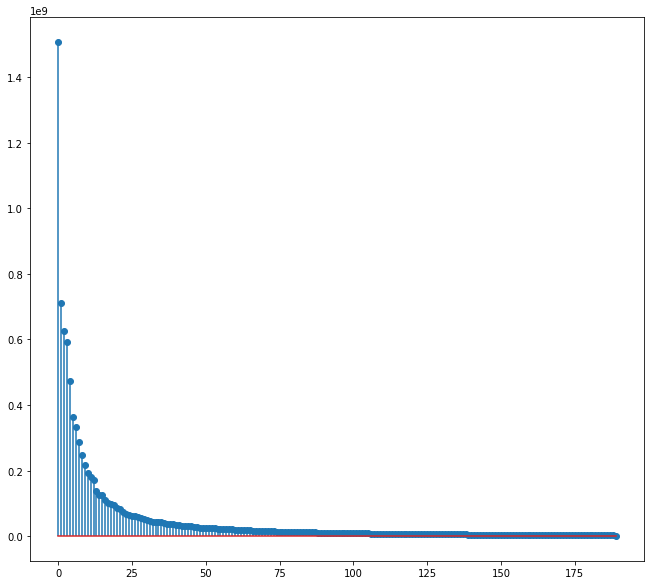

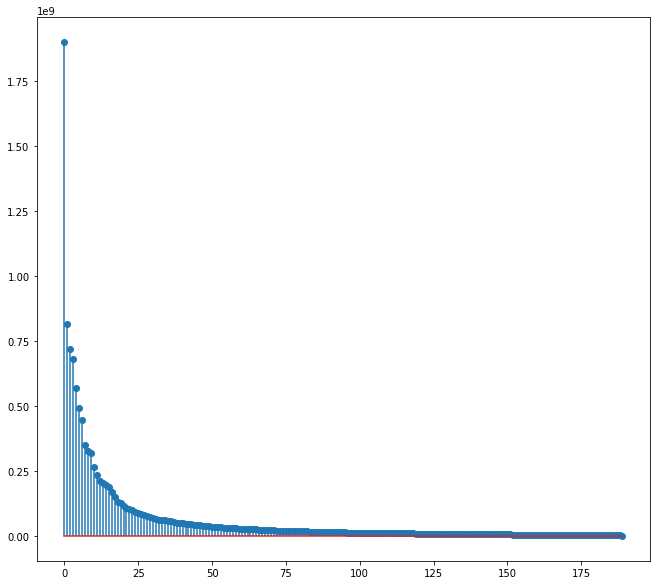

<Figure size 792x720 with 0 Axes>

In [24]:
plt.stem(evalue_neutral,use_line_collection=True)
plt.show()
plt.savefig('image/eigenvalues_neutral.jpg')
plt.stem(evalue_smile,use_line_collection=True)
plt.show()
plt.savefig('image/eigenvalues_smile.jpg')